## Regressão Linear

O dataset contém informações sobre carros usados. O objetivo é por meio de uma regressão linear simples desenvolver um modelo de ML que deduza o preço do carro baseado em uma característica. As colunas do dataset são:

- year: ano de compra do carro
- selling_price: preço de venda
- km_driven: quilômetros rodados
- seller_type: tipo do vendedor
- transmission: manual ou automático
- owner: se é o primeiro proprietário do carro ou outras opções
- mileage: quilometragem (eficiência em quilôemtros por litro)
- engine: motor (em CC)
- max_power: força máxima (em bhp)
- torque: torque (em rotações por minuto (rpm))
- seats: número de assentos

Vamos primeiro realizar uma análise estatística inicial a correções, depois uma análise exploratória e por fim o desenvolvimento do modelo.

Devido a uma incompatibilidade do GitHub que não consegue renderizar os gráficos da biblioteca PLotly, vamos torná-los imagens estáticas PNG por meio da biblioteca Kaleido. Sua instalação se dá por:

!pip install -U kaleido

Mãos a obra.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [2]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.5 MB/s eta 0:00:00


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tudo certo com os imports. Há dados faltantes, vamos ver o que fazer:

## Análise estatística inicial 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           7787 non-null   float64
 2   selling_price  7787 non-null   float64
 3   km_driven      7787 non-null   float64
 4   fuel           7787 non-null   object 
 5   seller_type    7787 non-null   object 
 6   transmission   7787 non-null   object 
 7   owner          7787 non-null   object 
 8   mileage        7566 non-null   object 
 9   engine         7566 non-null   object 
 10  max_power      7572 non-null   object 
 11  torque         7565 non-null   object 
 12  seats          7566 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


Como há dados faltantes, vamos ver o que fazer.

Inicialmente, vamos observar com quantos dados ficaríamos se tirássemos os faltantes:

In [7]:
df.dropna().count()

name             7565
year             7565
selling_price    7565
km_driven        7565
fuel             7565
seller_type      7565
transmission     7565
owner            7565
mileage          7565
engine           7565
max_power        7565
torque           7565
seats            7565
dtype: int64

In [ ]:
(df.dropna().shape[0]/df.shape[0])*100

93.07332677165354

Se deletarmos os dados faltantes, ainda teremos 93% dos dados. Como é bastante, vamos optar por isso.

Óbvio que existem mil maneiras melhores de preencher os dados faltantes do que simplesmente deletá-los, mas vou fazer um documento só com isso.

In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

,year,selling_price,km_driven,seats
count,7565.000000,7.565000e+03,7.565000e+03,7565.000000
mean,2014.249570,6.693004e+05,6.770588e+04,5.421943
std,3.698028,8.250085e+05,5.687155e+04,0.954765
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.900000e+05,3.180000e+04,5.000000
50%,2015.000000,4.750000e+05,6.000000e+04,5.000000
75%,2017.000000,7.000000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Na média, o ano de compra mais comum dos carros é 2014, e os carros são desde 1994 até 2020 - legal que vai dá para ver o impacto da pandemia. Ainda assim, a média sendo 2014 não significa que a maioria dos carros é de 2014! 

O mínimo de assentos foi de 2 e o máximo 14 - deveria ser uma van.

In [10]:
df.year.value_counts()

2017.0    1009
2016.0     856
2018.0     803
2015.0     775
2013.0     665
2014.0     619
2012.0     606
2019.0     583
2011.0     540
2010.0     333
2009.0     196
2008.0     131
2007.0     109
2020.0      74
2006.0      60
2005.0      60
2004.0      42
2003.0      32
2002.0      18
2000.0      14
1999.0      11
1998.0       9
1997.0       9
2001.0       6
1994.0       2
1996.0       2
1995.0       1
Name: year, dtype: int64

A maioria dos carros é de 2017 na verdade.

In [11]:
df.nunique()

name             1833
year               27
selling_price     661
km_driven         873
fuel                4
seller_type         3
transmission        2
owner               5
mileage           381
engine            117
max_power         303
torque            376
seats               9
dtype: int64

Há 1833 modelos de carros diferentes a princípio - não podemos dar certeza porquê é bem capaz de termos o mesmo carro, mas preenchido de forma diferente.

Temos 27 anos diferentes e por ai vai.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7565 non-null   object 
 1   year           7565 non-null   float64
 2   selling_price  7565 non-null   float64
 3   km_driven      7565 non-null   float64
 4   fuel           7565 non-null   object 
 5   seller_type    7565 non-null   object 
 6   transmission   7565 non-null   object 
 7   owner          7565 non-null   object 
 8   mileage        7565 non-null   object 
 9   engine         7565 non-null   object 
 10  max_power      7565 non-null   object 
 11  torque         7565 non-null   object 
 12  seats          7565 non-null   float64
dtypes: float64(4), object(9)
memory usage: 827.4+ KB


Podemos ver que alguns valores que são numéricos estão como strings, vamos convertê-los mais para frente.

Por hora vamos analisar quantas possibilidades existem para cada informação nominal:

In [13]:
df.fuel.value_counts()

Diesel    4142
Petrol    3345
CNG         51
LPG         27
Name: fuel, dtype: int64

A maioria dos carros do dataset é a diesel, depois a gasolina, CNG e LPG, praticamente insignificantes.

In [14]:
df.seller_type.value_counts()

Individual          6234
Dealer              1095
Trustmark Dealer     236
Name: seller_type, dtype: int64

A maioria dos vendedores é uma pessoa física individual, depois temos os 'dealers' e por fim o 'trustmark dealer'. Devem ser pessoas intermediadoras do negócio.

In [15]:
df.transmission.value_counts()

Manual       6537
Automatic    1028
Name: transmission, dtype: int64

A maioria dos carros do dataset é manual. Faz sentido, temos carros desde 1994 né. 

In [16]:
df.owner.value_counts()

First Owner             5125
Second Owner            1861
Third Owner              436
Fourth & Above Owner     138
Test Drive Car             5
Name: owner, dtype: int64

A maioria dos dados também reflete carros que foram vendidos e só haviam tido um dono até então. Temos informações detalhadas de até 4 donos anteriores e depois mais de 4, além de carros de test drive.

In [17]:
df.mileage.value_counts()

18.9 kmpl     225
19.7 kmpl     171
18.6 kmpl     164
21.1 kmpl     157
15.96 kmpl    115
             ... 
20.28 kmpl      1
13.38 kmpl      1
16.73 kmpl      1
21.4 km/kg      1
16.51 kmpl      1
Name: mileage, Length: 381, dtype: int64

kmpl = quilôemtros por litro

Aqui vamos ter que tirar as strings para podermos converter para número.

In [18]:
df.mileage = df.mileage.replace({'kmpl': '', 'km/kg': ''}, regex=True)

Primeiro tiramos as unidades (que são strings e não podem ser convertidas para número - o certo aqui seria deixar primeiro todos na mesma unidade e depois tirar a unidade). Por exemplo, temos carros que a medida está em kmpl (KM por L) e algumas que estão em KM/KG (KM por KG).

In [19]:
df.mileage.head(5)

0     23.4 
1    21.14 
3     23.0 
5    20.14 
7     16.1 
Name: mileage, dtype: object

In [20]:
df.mileage = df.mileage.astype(float)

Beleza, deu certo.

In [21]:
df.engine.head()

0    1248 CC
1    1498 CC
3    1396 CC
5    1197 CC
7     796 CC
Name: engine, dtype: object

O mesmo para 'engine'. Devemos tirar a unidade.

In [22]:
df.engine.value_counts()

1248 CC    1017
1197 CC     795
998 CC      453
796 CC      439
2179 CC     387
           ... 
1590 CC       1
2496 CC       1
2835 CC       1
1390 CC       1
1950 CC       1
Name: engine, Length: 117, dtype: int64

In [23]:
df.engine = df.engine.replace({'CC': ''}, regex=True)

In [24]:
df.engine = df.engine.astype(int)

Show de bola. Vamos conferir:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7565 non-null   object 
 1   year           7565 non-null   float64
 2   selling_price  7565 non-null   float64
 3   km_driven      7565 non-null   float64
 4   fuel           7565 non-null   object 
 5   seller_type    7565 non-null   object 
 6   transmission   7565 non-null   object 
 7   owner          7565 non-null   object 
 8   mileage        7565 non-null   float64
 9   engine         7565 non-null   int64  
 10  max_power      7565 non-null   object 
 11  torque         7565 non-null   object 
 12  seats          7565 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 827.4+ KB


In [26]:
df.max_power.value_counts()

74 bhp       377
81.80 bhp    220
88.5 bhp     204
67 bhp       165
46.3 bhp     162
            ... 
175 bhp        1
57 bhp         1
80.84 bhp      1
68.4 bhp       1
135.1 bhp      1
Name: max_power, Length: 303, dtype: int64

Também vamos tirar a unidade.

In [27]:
df.max_power = df.max_power.replace({'bhp': ''}, regex=True)

In [28]:
df.max_power = df.max_power.astype(float)

In [29]:
df.torque.value_counts()

190Nm@ 2000rpm             530
200Nm@ 1750rpm             445
90Nm@ 3500rpm              405
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
285Nm@ 2400-4000rpm          1
96  Nm at 3000  rpm          1
Name: torque, Length: 376, dtype: int64

Essa variável vai dar bastante trabalho para converter -  a ver que temos valores anteriores ao @ e após o @ temos não apenas números,como a unidade (rpm) e em alguns casos intervalos. 

Vamos deixar de lado por hora.

In [30]:
df.seats.value_counts()

5.0     5944
7.0     1112
8.0      228
4.0      131
9.0       75
6.0       62
10.0      10
2.0        2
14.0       1
Name: seats, dtype: int64

A maioria dos carros tem 5 assentos. Faz sentido. Vamos converter para inteiros.

In [31]:
df.seats = df.seats.astype(int)

In [32]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,59Nm@ 2500rpm,4


Perfeito, é com esse dataset que realizaremos a análise exploratória, a modelagem e o modelo.

Naõ vamos usar a variável torque primeiro porque parece que é um intervalo em alguns casos. Aí não temos muitas opções - poderíamos até tentar colocar a diferença para ver, mas para casos em que é um número apenas iria ficar diferente demais. Segundo que eu teria que entender o que é essa variável e o que podemos extrair de valor dai. Portanto, vamos seguir sem ela, apesar de acreditar que o torque tenha influência - nem que indireta - no valor de um veículo usado.

## Análise Exploratória

In [33]:
ano = df.groupby(by='year').mean()
contagem_ano = df.groupby(by='year').count()

Vamos avaliar o preço médio dos carros ao longo dos anos:

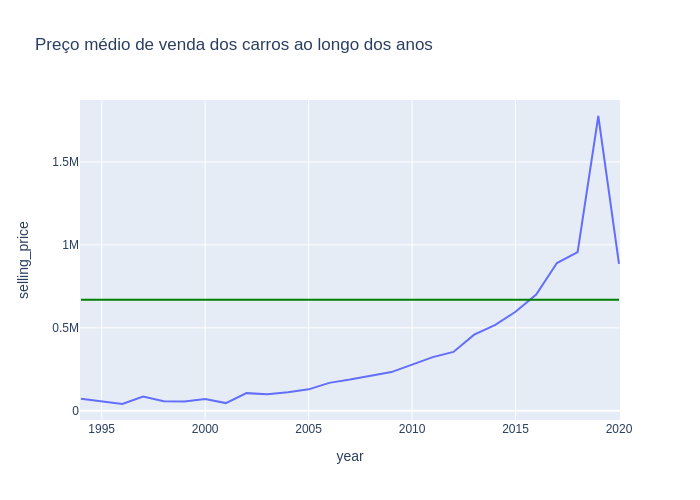

In [35]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(ano, x=ano.index, y="selling_price", title='Preço médio de venda dos carros ao longo dos anos')
fig.add_shape(type='line', 
                x0=1994,
                y0=df.selling_price.mean(),
                x1=2020,
                y1=df.selling_price.mean(),
                line=dict(color='Green',),
                xref='x',
                yref='y'
)
fig.show(renderer="png")

Legal, podemos ver que os preços vão aumentando. Ou seja, carros mais novos são mais caros, faz bastante sentido. Temos uma queda abrupta no ano de 2020 e isso nos mostra que a média do preço abaixou. Foi durante a pandemia e realmente os preços abaixaram. 

Carros comprados em 2020, portanto, tiveram um baixo preço de venda. Provavelmente, quem vendeu precisava do dinheiro e vendeu por menos do que o carro valia - é uma hipótese. 

Nós sabemos que depois os carros usados vieram a valorizar muito, mas talvez no começo de 2020, devido a várias incertezas, os preços tenham caído por conta disso mesmo.

De qualquer forma, o preço médio de venda de 2019 tá meio esquisito: 1.7 milhões? A não ser que a moeda do local que os dados foram registrados seja diferente, 1.7 milhões de reais ou dólares é esquisito. Vamos investigar:

In [36]:
df.selling_price.describe()

count    7.565000e+03
mean     6.693004e+05
std      8.250085e+05
min      2.999900e+04
25%      2.900000e+05
50%      4.750000e+05
75%      7.000000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

O máximo é um valor bem alto mesmo.

In [37]:
df.selling_price.tail(10)

8117    625000.0
8118    380000.0
8119    360000.0
8120    120000.0
8121    260000.0
8122    475000.0
8123    320000.0
8125    382000.0
8126    290000.0
8127    290000.0
Name: selling_price, dtype: float64

Analisando os últimos 10 valores, podemos ver que o índice 8117 tem o valor de 625000 unidades. Vamos ver que carro que é - se é de uma marca cara mesmo - para tentar inferir a moeda dos carros.

In [38]:
df.loc[8117]

name             Maruti Swift Dzire VDI
year                             2015.0
selling_price                  625000.0
km_driven                       50000.0
fuel                             Diesel
seller_type                  Individual
transmission                     Manual
owner                       First Owner
mileage                           26.59
engine                             1248
max_power                          74.0
torque                   190Nm@ 2000rpm
seats                                 5
Name: 8117, dtype: object

Pegamos um carro cujo preço de venda estava em 625000.0 unidades para ver se esse é um carrão mesmo ou não.

Não parece na verdade, o carro tem 50 mil km rodados, manual e de 2015. Me parece um preço exagerado em moedas conhecidas, portanto, vamos partir do pressuposto que a moeda do dataset está correta e 1.7 milhão por um carro usado é razoável.

Além disso, fora esse valor, o gráfico não nos dá mais nenhuma desconfiaça. Só por desencargo de consciência, eu pesquisei o carro na internet. Realmente, não parece ser um carro que vale tudo isso em reais ou dólares:

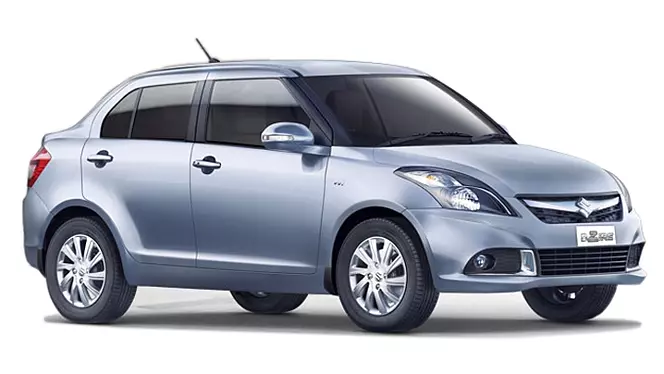

Vamos agora ver de quando são os carros, suspeito que mesmo que 2020 tenha tido um ano baixo em comparação com 2019, esse ano deve ter poucos exemplares.

Afinal, o ano representa o ano de compra do veículo e (i) em 2020 as montadoras pararam com a pandemia, (ii) o dataset acaba (então não 'deu tempo' do comprador do carro querer vendê-lo).

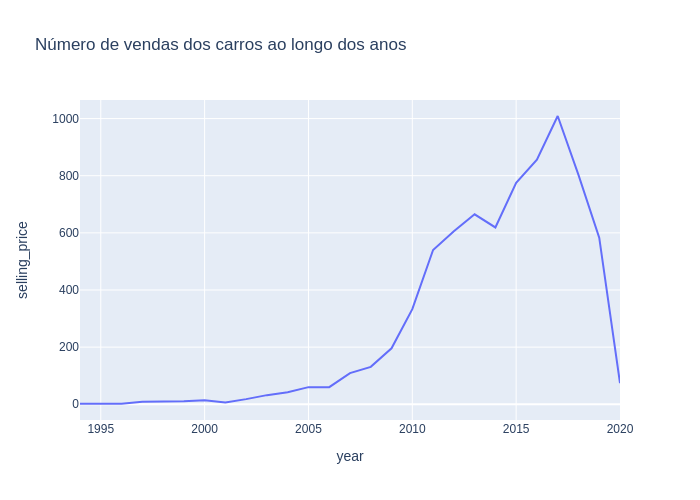

In [39]:
import plotly.express as px

fig = px.line(contagem_ano, x=contagem_ano.index, y="selling_price", title='Número de vendas dos carros ao longo dos anos')
fig.show(renderer="png")

De fato, enquanto que existem 1009 carros fabricados em 2019 e vendidos depois daí, em 2020 existem apenas 74.

Essas informações não são possíveis de ver no GitHub porquê o gráfico está estético, mas no Colab o gráfico é interativo e podemos passar o mouse por cima de tudo e ter seus valores exatos.

Vamos ver agora se algum combustível vem caindo em desuso:

In [40]:
usoCombustivel = df.groupby(by=['fuel', 'year']).mean()
usoCombustivellinha = usoCombustivel.reset_index(level=['year'])
usoCombustivellinha

,year,selling_price,km_driven,mileage,engine,max_power,seats
fuel,,,,,,,
CNG,2010.0,1.883333e+05,93333.333333,20.476667,1292.333333,78.466667,5.000000
CNG,2011.0,1.985000e+05,96750.250000,19.870000,1069.500000,65.100000,5.000000
CNG,2012.0,2.214000e+05,112060.000000,23.726000,1056.200000,59.860000,5.000000
CNG,2013.0,2.196667e+05,80000.000000,29.860000,930.666667,54.596667,5.000000
CNG,2014.0,3.512500e+05,66250.000000,23.245000,1190.750000,68.175000,5.500000
...,...,...,...,...,...,...,...
Petrol,2016.0,5.832774e+05,44010.002331,19.620862,1259.240093,84.910210,5.114219
Petrol,2017.0,6.025893e+05,35001.835267,19.900441,1209.162413,83.952993,5.111369
Petrol,2018.0,6.065510e+05,28072.290816,20.278469,1163.489796,81.911403,5.091837


In [41]:
CNG = usoCombustivel.query('fuel=="CNG"')
CNG

selling_price      km_driven    mileage       engine  max_power  \
fuel year                                                                      
CNG  2010.0  188333.333333   93333.333333  20.476667  1292.333333  78.466667   
     2011.0  198500.000000   96750.250000  19.870000  1069.500000  65.100000   
     2012.0  221400.000000  112060.000000  23.726000  1056.200000  59.860000   
     2013.0  219666.666667   80000.000000  29.860000   930.666667  54.596667   
     2014.0  351250.000000   66250.000000  23.245000  1190.750000  68.175000   
     2015.0  267500.000000   40000.000000  22.820000  1194.500000  58.465000   
     2016.0  323333.333333   50895.000000  25.046667  1064.000000  59.556667   
     2017.0  371111.111111   64666.666667  24.771111  1085.555556  58.286667   
     2018.0  414999.800000   54000.000000  25.668000  1037.600000  58.868000   
     2019.0  401714.142857   37857.142857  27.365714  1025.142857  54.594286   
     2020.0  392999.666667   18666.666667  25.273333  1062.666667  56.900000   

                seats  
fuel year              
CNG  2010.0  5.000000  
     2011.0  5.000000  
     2012.0  5.000000  
     2013.0  5.000000  
     2014.0  5.500000  
     2015.0  5.000000  
     2016.0  5.000000  
     2017.0  4.888889  
     2018.0  5.000000  
     2019.0  4.571429  
     2020.0  5.000000

O CNG, por exemplo, foi aplicado nos carros a partir de 2010 só e de 2010 até 2019 ele veio crescendo, com alguns anos em que carros com CNG tiveram preço médio de venda mais baixo do que a tendência indicava. Legal.

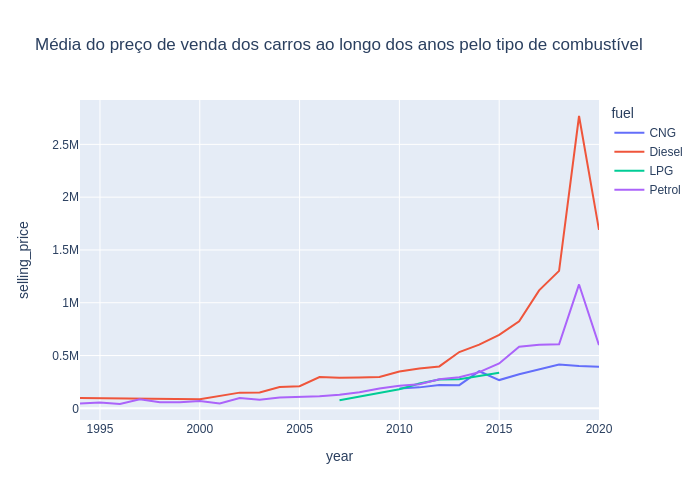

In [43]:
fig = px.line(usoCombustivellinha, x=usoCombustivellinha.year, y="selling_price", title='Média do preço de venda dos carros ao longo dos anos pelo tipo de combustível', color=usoCombustivellinha.index)
fig.show(renderer="png")

De maneira mais visual, podemos observar que os carros mais caros são os a diesel, seguidos pelos a gasolina e depois LPG (que só começou a ser implementado em 2007) e por último o CNG, que também só começou a ser implementado depois, em 2010.

Além disso, o preço dos carros vem aumentando, como visto antes, independentemente do combustível, com a queda em 2020.

Os dois últimos combustíveis, inclusive, não parecem seguir o mesmo comportamento dos dois primeiros e mais comuns. Legal.

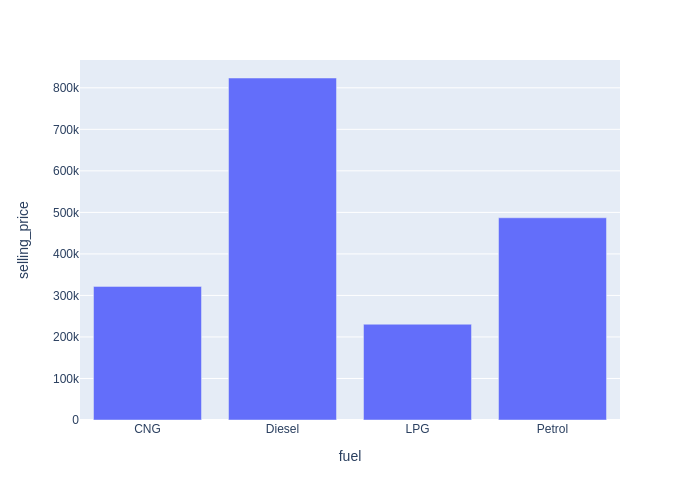

In [44]:
fuel = df.groupby(by='fuel').mean()
fig = px.bar(fuel, x=fuel.index, y='selling_price')
fig.show(renderer="png")

De fato, o que combustível dos carros mais caros é diesel, na média.

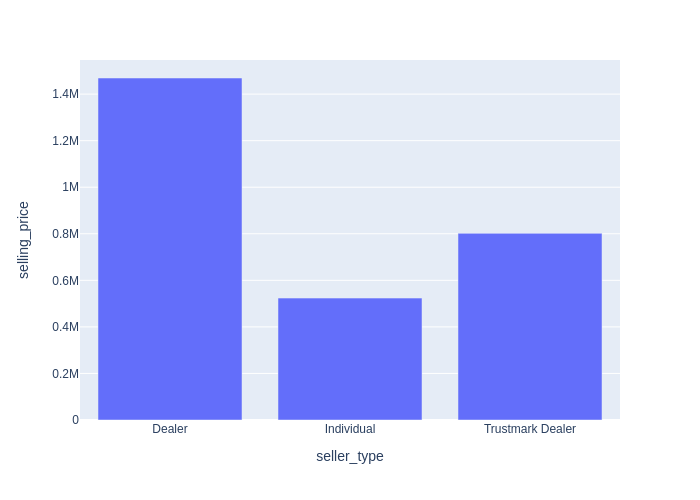

In [45]:
seller_type = df.groupby(by='seller_type').mean()
fig = px.bar(seller_type, x=seller_type.index, y='selling_price')
fig.show(renderer="png")

Os carros mais caros são aqueles comercializados por 'dealers, depois 'dealers' verificados e só por último por pessoas individuais, apesar de ser esse tipo de vendedor o de maior ocorrência, eles são os que na média vendem os carros mais baratos. Interessante.

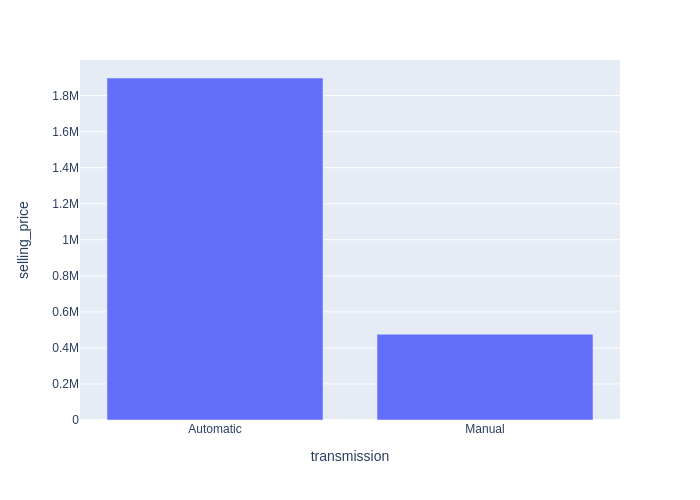

In [46]:
transmission = df.groupby(by='transmission').mean()
fig = px.bar(transmission, x=transmission.index, y='selling_price')
fig.show(renderer="png")

Os carros automáticos são mais caros, apesar de no dataset termos mais carros manuais. Faz bastante sentido.

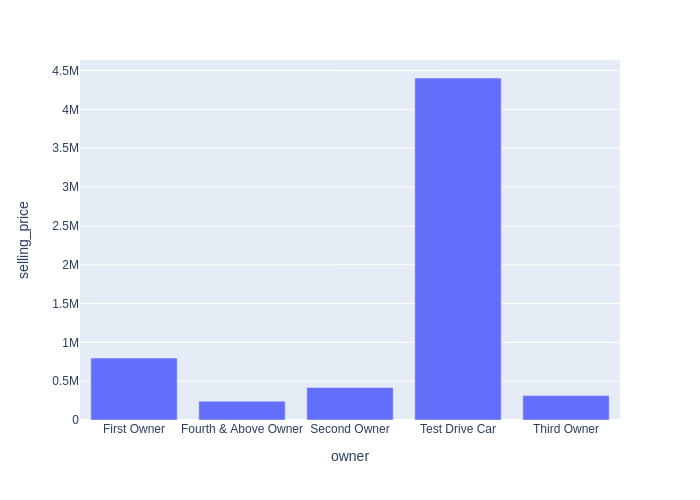

In [47]:
owner = df.groupby(by='owner').mean()
fig = px.bar(owner, x=owner.index, y='selling_price')
fig.show(renderer="png")

Os carros mais caros na média são os de test drive, mas esse dado é praticamente indiferente dado que apenas 5 carros tiveram como "dono prévio" o carro de teste drive. Excluindo o test drive car, os carros mais caros são aqueles que só tiveram um dono e assim por diante.

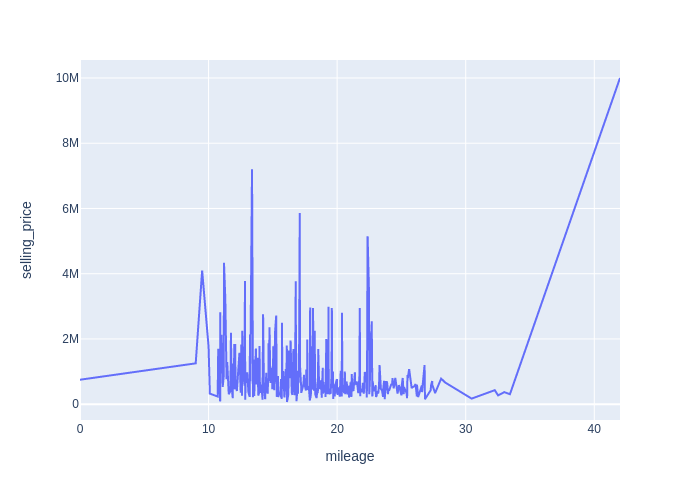

In [49]:
mileage = df.groupby(by='mileage').mean()
fig = px.line(mileage, x=mileage.index, y='selling_price')
fig.show(renderer="png")

Esse gráfico ficou meio doido e não podemos concluir muitas coisas.

Não acredito que possamos tirar nenhuma conclusão interessante a respeito da quilometragem e do preço de venda, contrariando minhas expectativas.

Possivelmente, a unidade está influenciando de novo, uma vez porquê acho improvável carros que fazem 30 quilômetros por litro. 

Vamos deixar de lado por hora.

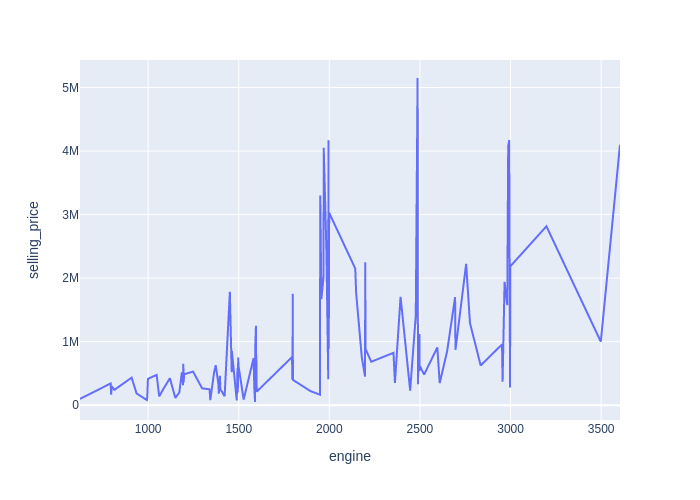

In [50]:
engine = df.groupby(by='engine').mean()
fig = px.line(engine, x=engine.index, y='selling_price')
fig.show(renderer="png")

Observando a relação da quantidade de cavalos com o preço de venda, podemos ver que, de maneira geral, quanto maior o número de cavalos, mais caro o carro, salvo algumas exceções e 'buracos' em nossa curva. Parece que alguns valores específicos de 'cavalos' são os que deixam os carros mais valorizados, como 2487, 2993 e 1995 CC.

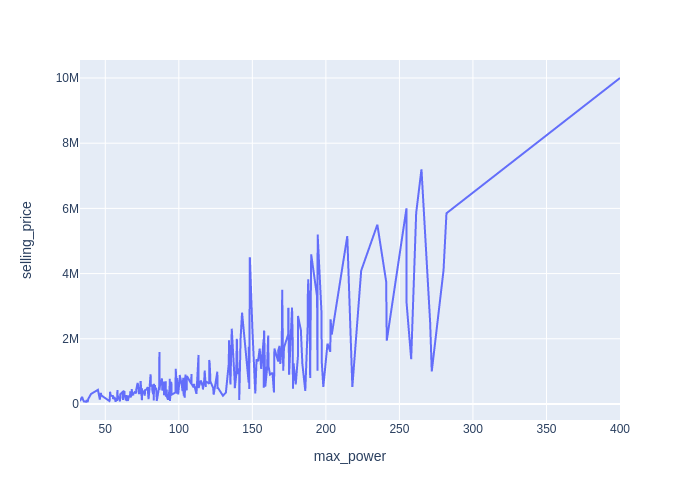

In [51]:
max_power = df.groupby(by='max_power').mean()
fig = px.line(max_power, x=max_power.index, y='selling_price')
fig.show(renderer="png")

Aqui podemos obervar claramente que quanto maior a variável max_power, mais caro o carro na hora da venda. Muito interessante.

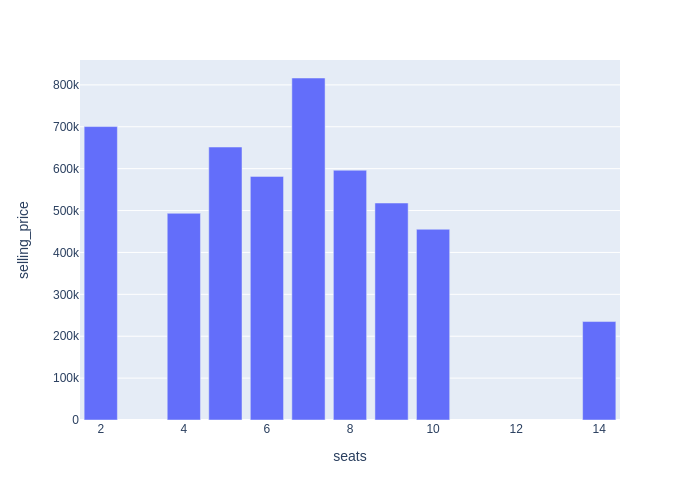

In [52]:
seats = df.groupby(by='seats').mean()
fig = px.bar(seats, x=seats.index, y='selling_price')
fig.show(renderer="png")

Os carros com 7 assentos foram os mais caros do dataset, seguidos dos de 2 lugares. 


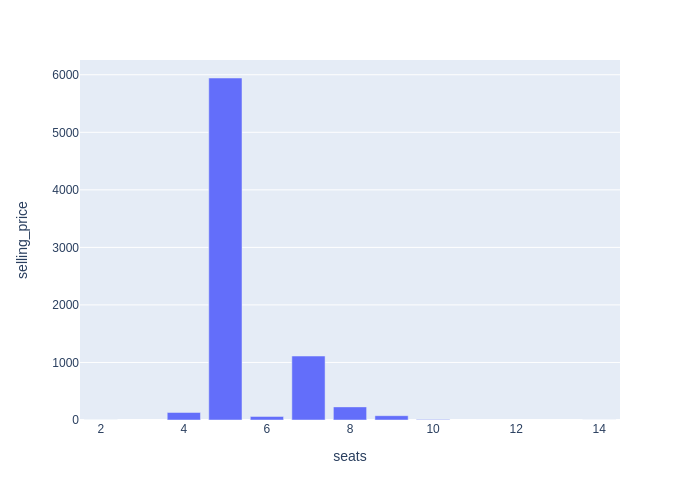

In [53]:
count_seats = df.groupby(by='seats').count()
fig = px.bar(count_seats, x=count_seats.index, y='selling_price')
fig.show(renderer="png")

Apesar dos preços no gráfico acima deste, podemos ver que a vasta maioria dos carros tem 5 assentos.

Entretanto, os carros de 5 assentos não são os mais caros na média.

In [54]:
count_seats

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
seats,,,,,,,,,,,,
2,2,2,2,2,2,2,2,2,2,2,2,2
4,131,131,131,131,131,131,131,131,131,131,131,131
5,5944,5944,5944,5944,5944,5944,5944,5944,5944,5944,5944,5944
6,62,62,62,62,62,62,62,62,62,62,62,62
7,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
8,228,228,228,228,228,228,228,228,228,228,228,228
9,75,75,75,75,75,75,75,75,75,75,75,75
10,10,10,10,10,10,10,10,10,10,10,10,10
14,1,1,1,1,1,1,1,1,1,1,1,1


Olhando com mais detalhes, podemos ver que na verdade carros de 2 e 14 assentos não são estatisticamente significativos e tem muito poucos exemplares para justificar o primeiro gráfico.

Vamos analisar agora quais são as variáveis com maior correlação com o preço:

In [55]:
df2 = pd.get_dummies(df.drop(['name','torque'], axis=1))

Vamos tirar o modelo do carro e seu torque para criar o nosso modelo.

Vamos também usar do one-hot-enconding para converter de maneira ideal as variáveis categóricas em numéricas.

In [56]:
df2

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,450000.0,145500.0,23.40,1248,74.00,5,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,2014.0,370000.0,120000.0,21.14,1498,103.52,5,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,2010.0,225000.0,127000.0,23.00,1396,90.00,5,0,1,0,...,0,1,0,0,1,1,0,0,0,0
5,2017.0,440000.0,45000.0,20.14,1197,81.86,5,0,0,0,...,0,1,0,0,1,1,0,0,0,0
7,2001.0,45000.0,5000.0,16.10,796,37.00,4,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,2014.0,475000.0,80000.0,22.54,1396,88.73,5,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8123,2013.0,320000.0,110000.0,18.50,1197,82.85,5,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8125,2009.0,382000.0,120000.0,19.30,1248,73.90,5,0,1,0,...,0,1,0,0,1,1,0,0,0,0
8126,2013.0,290000.0,25000.0,23.57,1396,70.00,5,0,1,0,...,0,1,0,0,1,1,0,0,0,0


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 8127
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7565 non-null   float64
 1   selling_price                 7565 non-null   float64
 2   km_driven                     7565 non-null   float64
 3   mileage                       7565 non-null   float64
 4   engine                        7565 non-null   int64  
 5   max_power                     7565 non-null   float64
 6   seats                         7565 non-null   int64  
 7   fuel_CNG                      7565 non-null   uint8  
 8   fuel_Diesel                   7565 non-null   uint8  
 9   fuel_LPG                      7565 non-null   uint8  
 10  fuel_Petrol                   7565 non-null   uint8  
 11  seller_type_Dealer            7565 non-null   uint8  
 12  seller_type_Individual        7565 non-null   uint8  
 13  sel

Agora vamos observar se essas novas features tem um impacto significativo no preço do carro por meio da correlação de pearson:

In [58]:
corr = df2.corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.000000,0.401250,-0.417920,0.293766,0.031483,0.233915,-0.018671,0.028078,0.029251,-0.049597,...,0.202361,-0.230090,0.094404,0.247287,-0.247287,0.472532,-0.209810,-0.311300,0.033038,-0.255675
selling_price,0.401250,1.000000,-0.213422,-0.149872,0.464529,0.756933,0.039403,-0.034705,0.205822,-0.031822,...,0.398927,-0.381784,0.028830,0.590504,-0.590504,0.226744,-0.070571,-0.173512,0.116420,-0.106460
km_driven,-0.417920,-0.213422,1.000000,-0.158965,0.203431,-0.033993,0.235823,-0.004611,0.275769,0.020167,...,-0.172181,0.195761,-0.080296,-0.198800,0.198800,-0.285591,0.085727,0.204017,-0.024002,0.149226
mileage,0.293766,-0.149872,-0.158965,1.000000,-0.583062,-0.385972,-0.470048,0.103537,0.054637,-0.008994,...,-0.006966,0.026406,-0.043737,-0.192796,0.192796,0.144530,-0.064925,-0.090889,-0.016948,-0.082782
engine,0.031483,0.464529,0.203431,-0.583062,1.000000,0.707508,0.615084,-0.060932,0.512310,-0.050132,...,0.129097,-0.137601,0.040105,0.285225,-0.285225,-0.013970,-0.008711,0.021030,0.014262,-0.007413
max_power,0.233915,0.756933,-0.033993,-0.385972,0.707508,1.000000,0.198244,-0.072002,0.313791,-0.052074,...,0.300147,-0.289040,0.025614,0.542005,-0.542005,0.112722,-0.040454,-0.085839,0.050248,-0.049775
seats,-0.018671,0.039403,0.235823,-0.470048,0.615084,0.198244,1.000000,-0.039795,0.358381,-0.026451,...,-0.077142,0.084946,-0.029929,-0.075461,0.075461,-0.050787,0.009076,0.044290,-0.011366,0.016061
fuel_CNG,0.028078,-0.034705,-0.004611,0.103537,-0.060932,-0.072002,-0.039795,1.000000,-0.090626,-0.004931,...,-0.033893,0.038068,-0.014784,-0.032671,0.032671,-0.005358,0.000841,0.012955,-0.002119,-0.013443
fuel_Diesel,0.029251,0.205822,0.275769,0.054637,0.512310,0.313791,0.358381,-0.090626,1.000000,-0.065835,...,0.065264,0.006104,-0.145455,-0.029336,0.029336,-0.049456,-0.005076,0.058003,-0.017956,-0.003099
fuel_LPG,-0.049597,-0.031822,0.020167,-0.008994,-0.050132,-0.052074,-0.026451,-0.004931,-0.065835,1.000000,...,-0.018321,0.021833,-0.010740,-0.023733,0.023733,-0.010866,-0.008158,0.006989,-0.001539,0.013733


In [59]:
cor_target2 = abs(corr["selling_price"])
relevant_features = cor_target2[cor_target2>0.2]
relevant_features

year                      0.401250
selling_price             1.000000
km_driven                 0.213422
engine                    0.464529
max_power                 0.756933
fuel_Diesel               0.205822
seller_type_Dealer        0.398927
seller_type_Individual    0.381784
transmission_Automatic    0.590504
transmission_Manual       0.590504
owner_First Owner         0.226744
Name: selling_price, dtype: float64

Interessante, as variáveis com maior correlação com preço final são:
- max_power: 0.75
- transmissão automática ou manual
- ano

Vamos mudar a coluna de transmissão para outro enconding e ver se a correlação aumenta:

In [60]:
df_test = df
df_test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5


In [61]:
df.transmission.value_counts()

Manual       6537
Automatic    1028
Name: transmission, dtype: int64

In [62]:
df_test["transmission"].replace({"Manual": 1, "Automatic": 0}, inplace=True)
df_test['transmission'] = df['transmission'].astype('float64')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7565 non-null   object 
 1   year           7565 non-null   float64
 2   selling_price  7565 non-null   float64
 3   km_driven      7565 non-null   float64
 4   fuel           7565 non-null   object 
 5   seller_type    7565 non-null   object 
 6   transmission   7565 non-null   float64
 7   owner          7565 non-null   object 
 8   mileage        7565 non-null   float64
 9   engine         7565 non-null   int64  
 10  max_power      7565 non-null   float64
 11  torque         7565 non-null   object 
 12  seats          7565 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 1.1+ MB


In [63]:
corr3 = df_test.corr()

In [64]:
cor_target3 = abs(corr3["selling_price"])
relevant_features = cor_target3[cor_target3>0.2]
relevant_features

year             0.401250
selling_price    1.000000
km_driven        0.213422
transmission     0.590504
engine           0.464529
max_power        0.756933
Name: selling_price, dtype: float64

Se manteve igual na verdade. Tudo bem, vamos seguir com o que fizemos one-hot-enconding.

Vamos observar a dispersão das colunas com relação a variável target e ver se fazem sentido com as correlações:

In [65]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

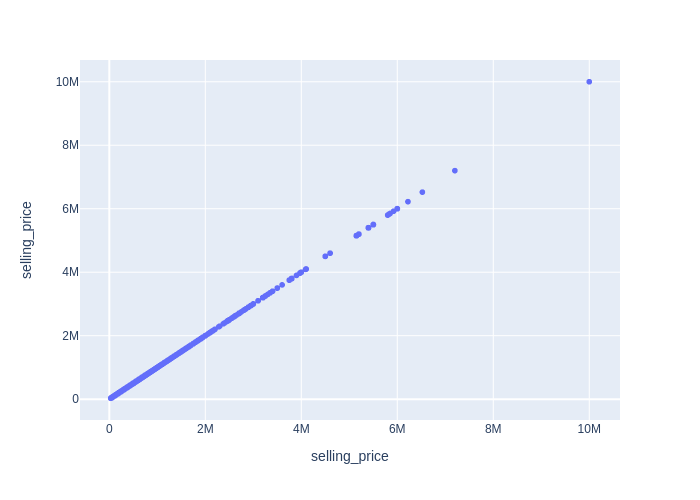

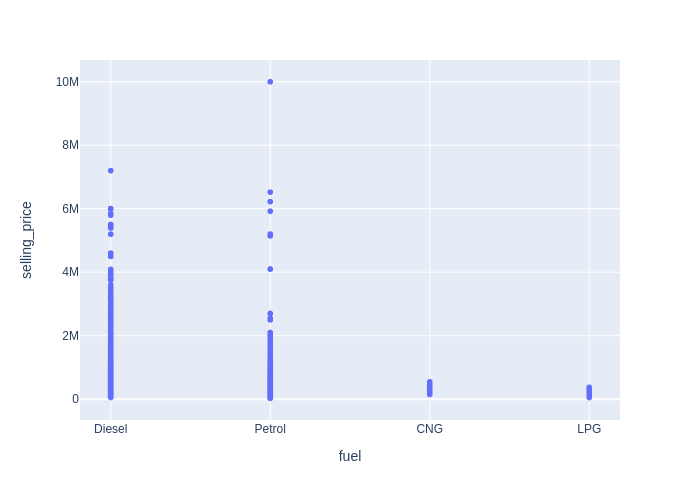

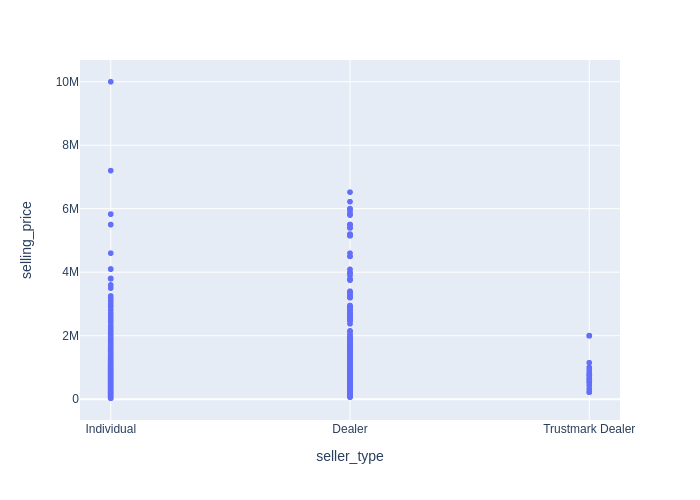

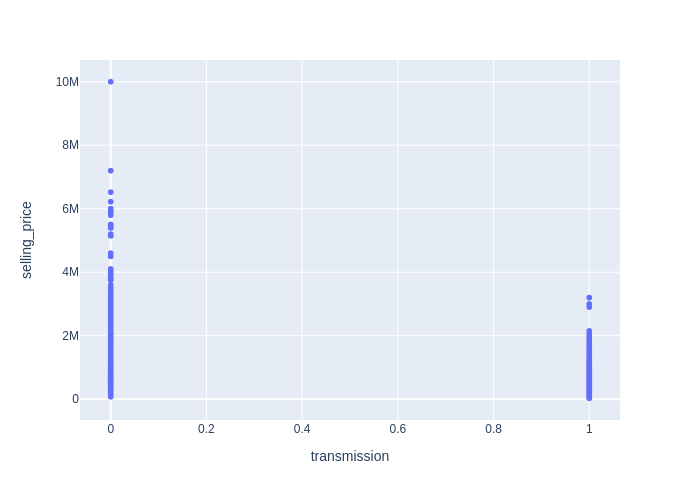

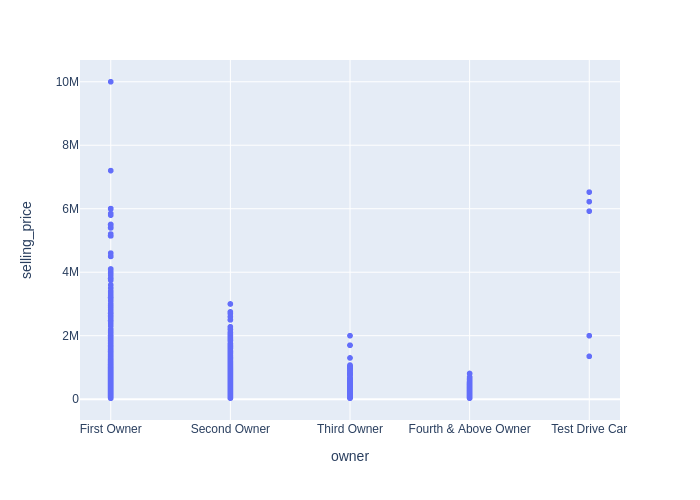

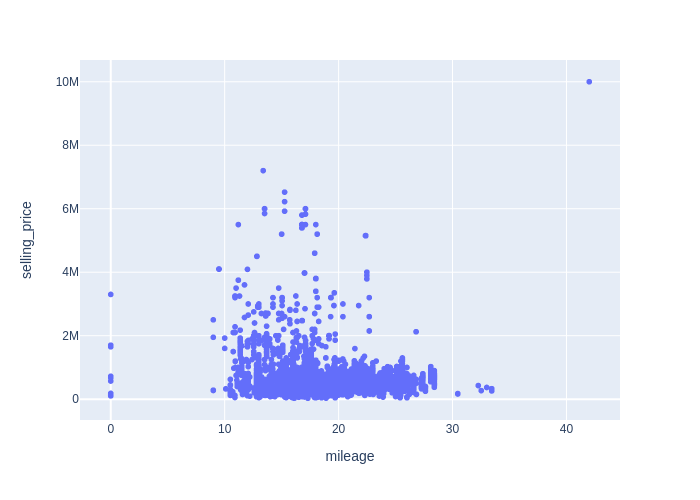

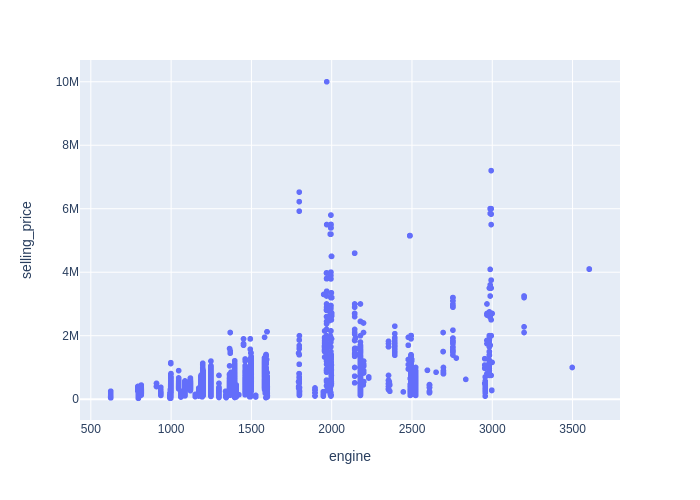

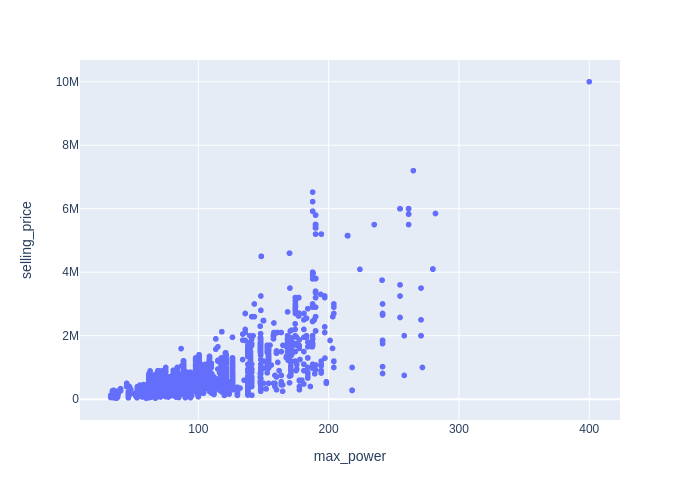

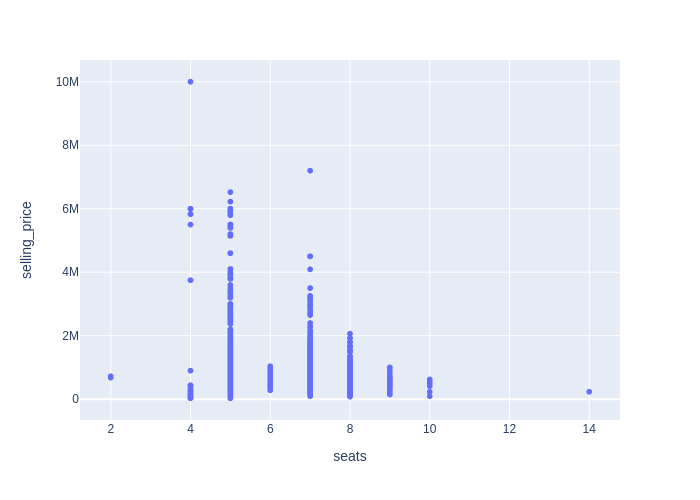

In [67]:
for column in df.drop(['name', 'year', 'km_driven','torque'], axis=1):
  fig = px.scatter(df, x=df[column], y="selling_price")
  fig.show(renderer="png")

max_power e engine são variáveis que indicam ter uma correlação alta mesmo, uma correlação diretamente proporcional.

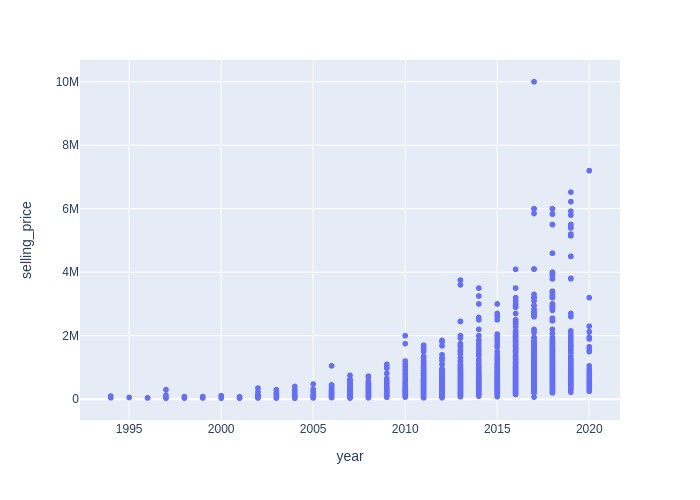

In [68]:
fig = px.scatter(df, x='year', y="selling_price")
fig.show(renderer="png")

O ano também tem uma relação com nossa variável target. 

Quanto mais novo o carro, mais caro. Tudo pela ordem.

Ainda assim, as 3 variáveis de maior correlação serão as usadas na regressão:

Vamos ao modelo.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [70]:
df2.head(2)

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,450000.0,145500.0,23.40,1248,74.00,5,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,2014.0,370000.0,120000.0,21.14,1498,103.52,5,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [71]:
features = df2[['max_power', 'transmission_Automatic', 'transmission_Manual', 'engine']]
target = df['selling_price']
features

,max_power,transmission_Automatic,transmission_Manual,engine
0,74.00,0,1,1248
1,103.52,0,1,1498
3,90.00,0,1,1396
5,81.86,0,1,1197
7,37.00,0,1,796
...,...,...,...,...
8122,88.73,0,1,1396
8123,82.85,0,1,1197
8125,73.90,0,1,1248
8126,70.00,0,1,1396


Dividimos entre a coluna target e a que vamos usar para predição.

In [72]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

Dados divididos em treino e teste (30%) e eliminamos a aleatoriedade com o random_state=42.

In [73]:
modelo = LinearRegression().fit(features_train, target_train)

yhat_ml_test = modelo.predict(features_test)
yhat_ml_train = modelo.predict(features_train)
r2_train = r2_score(target_train, yhat_ml_train)
r2_test = r2_score(target_test, yhat_ml_test)

print('Resultados do treino:')

print('-'*20)

print('Intercepto: {}'.format(modelo.intercept_))
print("Coeficiente: {}".format(modelo.coef_))
print('R2: {}'.format(r2_train))

Resultados do treino:
--------------------
Intercepto: -353143.8620398069
Coeficiente: [ 1.62089327e+04  2.91320809e+05 -2.91320809e+05 -1.75300561e+02]
R2: 0.6276104739138715


O modelo linear gera coeficientes para cada recurso durante o treinamento e retorna esses valores como uma matriz. No nosso caso, temos 3 recurso (max_power, engine e transmission) que serão refletidos por 3 valores.

O objetivo do Coeficiente de determinação R² (R2 score) é calcular o quanto nosso modelo encontrado, explica os dados melhor que a média. O score do R² varia de 0 a 1, e quanto maior, melhor. Se tivermos construído um modelo de machine learning e seu score é 0, isso quer dizer que o nosso modelo não consegue capturar nada além de um modelo que simplesmente pega a média dos dados. Já se obtivermos um valor de 0.9, isso quer dizer que o modelo consegue explicar 90% da variância dos dados. 

Um r2 de .62, sem nenhum tratamento ou tunação de hiperparâmetro é bom.

Vamos ver agora os resultados do teste:



In [74]:
print('Resultados Teste:')
print('-'*20)
print('R2: {}'.format(r2_test))

Resultados Teste:
--------------------
R2: 0.6114643896951178


Piorou um pouquinho, mas ainda está aceitável.

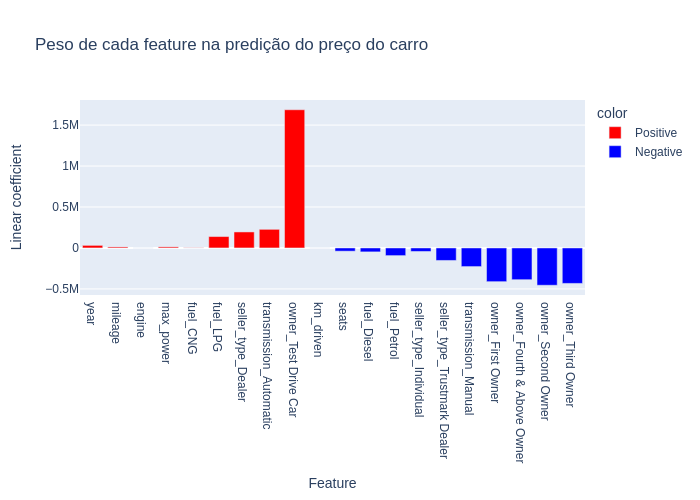

In [76]:
X = df2.drop(columns=['selling_price'])
y = df2['selling_price']

model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Peso de cada feature na predição do preço do carro'
)
fig.show(renderer="png")

Aqui podemos ver quais são as variáveis com maior peso na predição do preço, bem bacana e apesar de a maior ter sido a 'owner_test_car_drive', não a escolheria por ela ter muito poucos representantes.

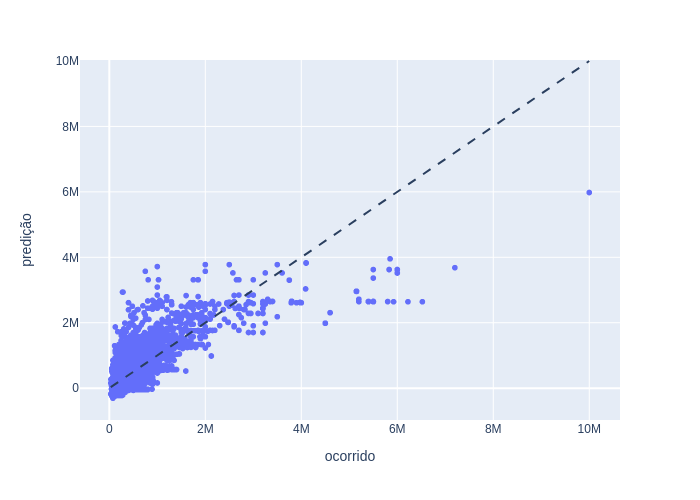

In [77]:
X = df[['max_power', 'engine', 'transmission']]
y = df['selling_price']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ocorrido', 'y': 'predição'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show(renderer="png")

Por fim um gráfico da nossa curva com os pontos preditos.Realemente, não parecem muito próximos e talvez outras regressões representassem melhor os dados. 

O que podemos concluir é que o modelo sentiu mais dificuldade de prever valores mais altos, eles descolaram mais.

Tunar os hiperparâmetros e uma modelagem mais assertiva poderiam, sem dúvida, melhorar a acuracidade do modelo.